In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 0. Note

* This notebook produces figures and calculations presented in [Ye et al. 2017, JGR](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016JB013811).

* This notebook demonstrates how to correct pressure scales for the existing phase boundary data.

# 1. Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Pressure calculations for PPv

* Data from Tateno2009

T (K) | Au-Tsuchiya | Pt-Holmes | MgO-Speziale
------|-------------|-----------|--------------
3500  | 120.4       | 137.7     | 135.6
2000  | 110.5       | 126.8     | 115.8

Here I provide data for plotting the boundaries.  These are merely digitized reading of the phase boundary.

In [3]:
p_Au_t_ppv = np.asarray([120.4, 110.5])
p_Pt_h_ppv = np.asarray([137.7, 126.8])
p_MgO_s_ppv = np.asarray([135.6, 115.8])

In [4]:
t_ppv = np.asarray([3500., 2000.])

Let's plot these boundaries together

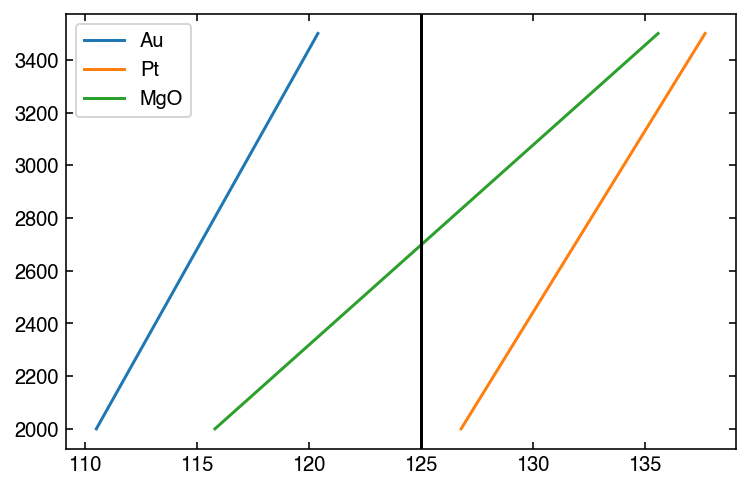

In [5]:
plt.plot(p_Au_t_ppv, t_ppv, label='Au')
plt.plot(p_Pt_h_ppv, t_ppv, label='Pt')
plt.plot(p_MgO_s_ppv, t_ppv, label='MgO')
plt.axvline(125, c='k')
plt.legend()

Let's calculate Clapeyron slopes $\Delta P / \Delta T$ of the different lines.

In [7]:
print('slope from the Au scale: ', \
      (p_Au_t_ppv[0]-p_Au_t_ppv[1])/(t_ppv[0]-t_ppv[1]))

slope from the Au scale:  0.006600000000000003


In [8]:
print('slope from the Pt scale: ', \
      (p_Pt_h_ppv[0]-p_Pt_h_ppv[1])/(t_ppv[0]-t_ppv[1]))

slope from the Pt scale:  0.007266666666666661


In [9]:
print('slope from the MgO scale: ', \
      (p_MgO_s_ppv[0]-p_MgO_s_ppv[1])/(t_ppv[0]-t_ppv[1]))

slope from the MgO scale:  0.013199999999999998


What are the problems do you see here?  Can use of consistent pressure scale solve this problem?

# 3. Re-calculate the PPv boundary

Let's get volume of pressure standards for pressure scale conversion.

In [10]:
Au_T = eos.gold.Tsuchiya2003()
Au_D = eos.gold.Dorogokupets2007()

In [11]:
v_Au = Au_T.cal_v(p_Au_t_ppv, t_ppv)
print(v_Au)

[51.58316296 51.69920856]


In [12]:
p_Au_D_ppv = Au_D.cal_p(v_Au, t_ppv)

What is the slope for this?

In [13]:
print('slope from the Au scale: ', \
      (p_Au_D_ppv[0]-p_Au_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

slope from the Au scale:  0.00720509+/-0.00000010


In [14]:
Pt_H = eos.platinum.Holmes1989()
Pt_D = eos.platinum.Dorogokupets2007()

In [15]:
v_Pt = Pt_H.cal_v(p_Pt_h_ppv, t_ppv)
print(v_Pt)

[48.05740166 48.08588902]


In [16]:
p_Pt_D_ppv = Pt_D.cal_p(v_Pt, t_ppv)
print('slope from the Pt scale: ', \
      (p_Pt_D_ppv[0]-p_Pt_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

slope from the Pt scale:  0.00801057+/-0.00000024


In [17]:
MgO_S = eos.periclase.Speziale2001()
MgO_D = eos.periclase.Dorogokupets2007()

In [18]:
v_MgO = MgO_S.cal_v(p_MgO_s_ppv, t_ppv)
print(v_MgO)

[52.86717743 53.60286284]


In [19]:
p_MgO_D_ppv = MgO_D.cal_p(v_MgO, t_ppv)

In [20]:
print('slope from the MgO scale: ', \
      (p_MgO_D_ppv[0]-p_MgO_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

slope from the MgO scale:  0.01092568+/-0.00000020


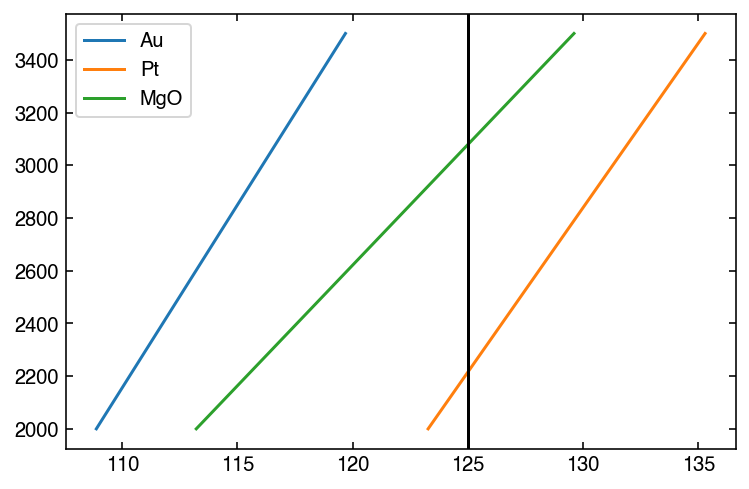

In [21]:
plt.plot(unp.nominal_values(p_Au_D_ppv), t_ppv, label="Au")
plt.plot(unp.nominal_values(p_Pt_D_ppv), t_ppv, label="Pt")
plt.plot(unp.nominal_values(p_MgO_D_ppv), t_ppv, label="MgO")
plt.axvline(125, c='k')
plt.legend()